In [15]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import timm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor
from timm.data.transforms_factory import create_transform, RandomResizedCropAndInterpolation
import numpy as np
from PIL import Image
import onnx
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'

In [7]:
model = timm.create_model('resnet50d', pretrained=True, scriptable=True)
model.eval()

x = torch.randn(2, 3, 224, 224, requires_grad=True)
torch_out = model(x)

torch.onnx.export(model,
                    x,
                    'resnet50d.onnx',
                    export_params=True,
                    opset_version=10,
                    do_constant_folding=True,
                    input_names=['input'],
                    output_names=['output'],
                    dynamic_axes={'input' : {0 : 'batch_size'},
                                    'output' : {0 : 'batch_size'}})


In [24]:
img = Image.open('C:\\dev\\Python\\Pytorch-Image-Models-For-Thesis\\my_work\\data\\ox_images\\shiba_inu_132.jpg')
# img = torch.as_tensor(np.array(img, dtype=np.float32)).transpose(0, 2)[None]


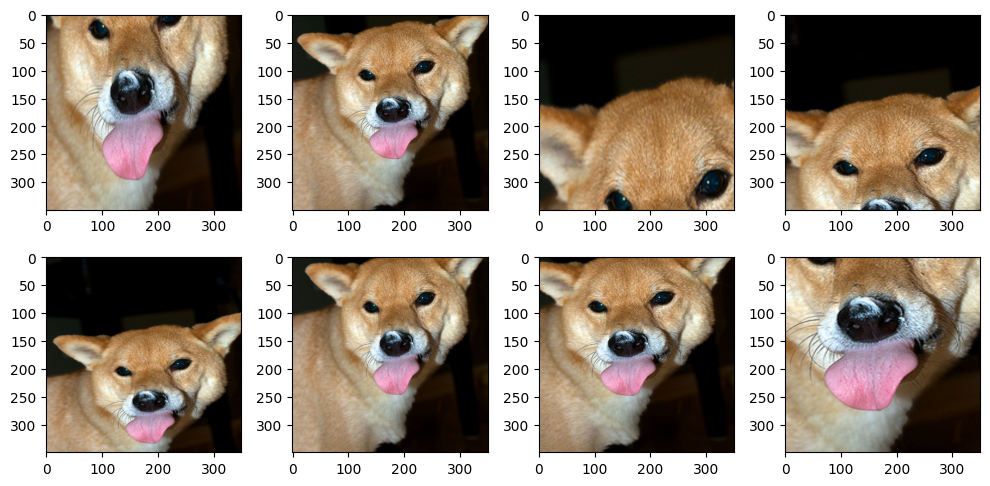

In [25]:
tfm = RandomResizedCropAndInterpolation(size=350, interpolation='random')

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(img) for i in range(4)]):
    ax[0, idx].imshow(im)
    
for idx, im in enumerate([tfm(img) for i in range(4)]):
    ax[1, idx].imshow(im)
    
fig.tight_layout()
plt.show()


In [26]:
create_transform(224, is_training=True, auto_augment='rand-m9-n3-mstd0.5')

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=3, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tenso